<a href="https://colab.research.google.com/github/nh0875/Desafios-Procesamiento-del-Habla-974/blob/main/Desafio_Regresi%C3%B3n_1_Hilliard_Final_Diciembre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INDICACIONES

1) Cada uno debe completar las consignas indicadas en este notebook.

2) Deben postear como solución enlace a su notebook colab público y también debe estar en su repositorio GitHub.

3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# Dataset



Explicacion del Dataset: **Simula información financiera y operativa de empresas en diferentes sectores**

**Interpretación del Valor
Bajo valor de morosidad promedio:
La empresa tiende a cumplir con sus pagos y tiene un buen manejo financiero.
Alto valor de morosidad promedio:
Indica un nivel de incumplimiento más elevado, lo que puede ser síntoma de problemas**

**Tiene una estructura de 7x1000**

Primeros registros del dataset:
            Empresa       Sector  Ingresos Anuales (kUSD)  Empleados  \
0     Empresa Alfa   Tecnología                     4037        190   
1  Empresa Epsilon   Tecnología                     3418        266   
2  Empresa Epsilon        Salud                     1108        337   
3    Empresa Delta     Finanzas                     2839        351   
4     Empresa Beta  Manufactura                     2393        192   

   Antigüedad (años)  Pagos a Tiempo (%)  Morosidad Promedio  
0                 16           61.160537            9.032942  
1                  3           51.489861            5.531837  
2                 13           85.800981            0.504435  
3                 18           90.471523            0.618558  
4                 10           60.765688            5.405378  


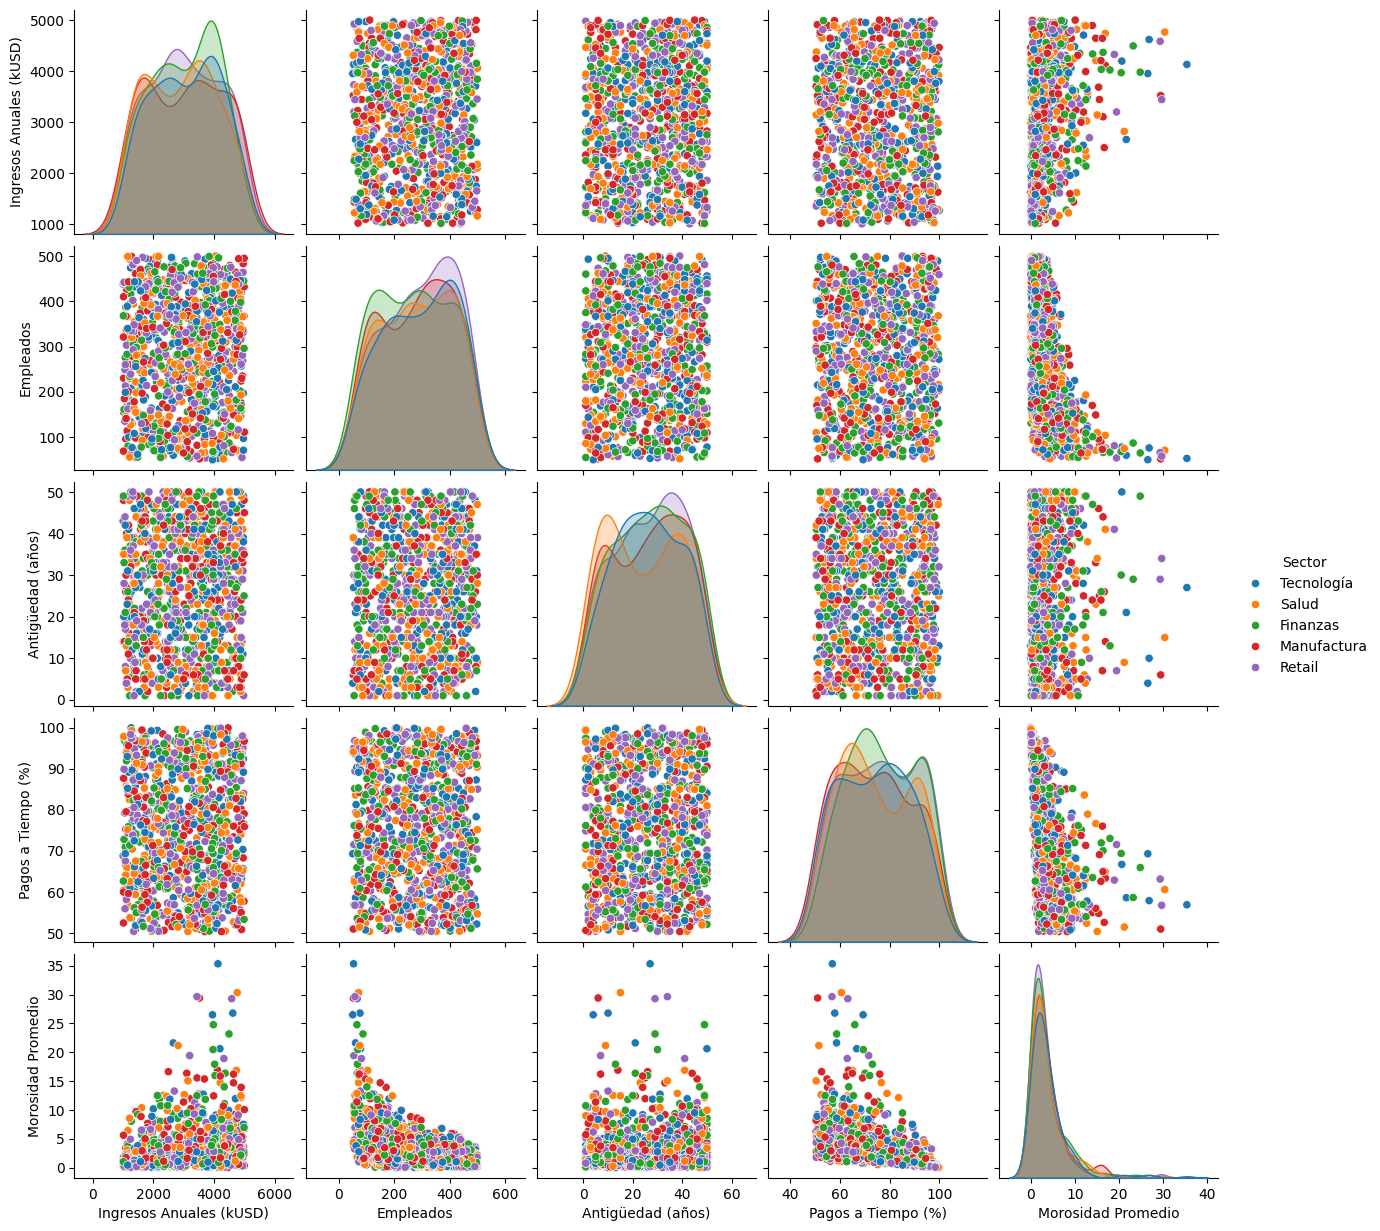

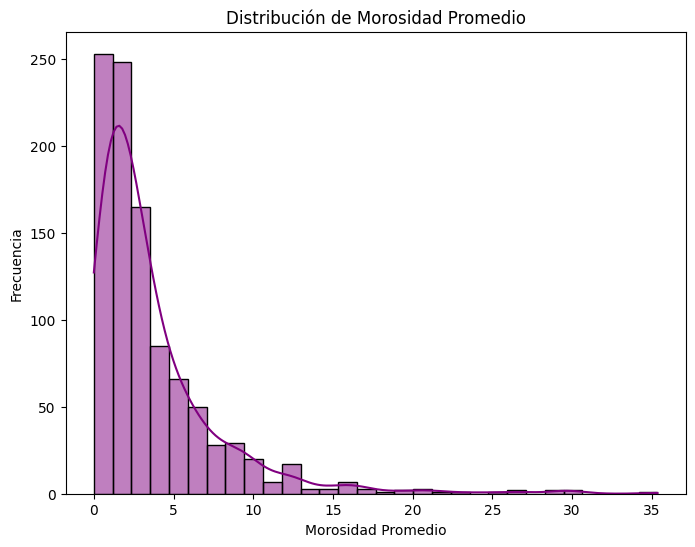

In [ ]:
# Importar librerías necesarias
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración inicial y generación de datos
random.seed(42)

# Dataset simplificado
nombres_empresas = [
    "Empresa Alfa", "Empresa Beta", "Empresa Gamma", "Empresa Delta", "Empresa Epsilon"
]
sectores = ["Tecnología", "Finanzas", "Retail", "Manufactura", "Salud"]
data = []

for i in range(1000):  # Crear 1000 registros
    empresa = random.choice(nombres_empresas)
    sector = random.choice(sectores)
    ingresos_anuales = random.randint(1000, 5000)  # En miles de dólares
    empleados = random.randint(50, 500)  # Cantidad de empleados
    antigüedad = random.randint(1, 50)  # Años de operación
    pagos_a_tiempo = random.uniform(0.5, 1.0)  # Proporción de pagos realizados a tiempo
    morosidad_promedio = ingresos_anuales / empleados * (1 - pagos_a_tiempo) * random.uniform(0.8, 1.2)
    data.append({
        "Empresa": empresa,
        "Sector": sector,
        "Ingresos Anuales (kUSD)": ingresos_anuales,
        "Empleados": empleados,
        "Antigüedad (años)": antigüedad,
        "Pagos a Tiempo (%)": pagos_a_tiempo * 100,
        "Morosidad Promedio": morosidad_promedio
    })

df = pd.DataFrame(data)
df

# Paso 1: Visualización inicial del dataset
print("Primeros registros del dataset:\n", df.head())

# Visualización de correlaciones
sns.pairplot(df, diag_kind="kde", hue="Sector")
plt.show()

# Visualización de la distribución de "Morosidad Promedio"
plt.figure(figsize=(8, 6))
sns.histplot(df["Morosidad Promedio"], kde=True, color="purple", bins=30)
plt.title("Distribución de Morosidad Promedio")
plt.xlabel("Morosidad Promedio")
plt.ylabel("Frecuencia")
plt.show()


## Preprocesamiento

Aplique un One Hot Encoding, elimine las columas "Empresa" y "Morosidad Promedio" de mi "X", agregue la variable independiente "Morosidad Promedio" a mi "y" ya que es mi variable objetivo por ultimo estandarice los datos para no tener problemas con el tamaño de los numeros, dividi mi dataset en entrenamiento y prueba (80/20)

In [ ]:
# Preprocesamiento de datos
df_encoded = pd.get_dummies(df, columns=["Sector"], drop_first=True)
X = df_encoded.drop(columns=["Empresa", "Morosidad Promedio"])
y = df_encoded["Morosidad Promedio"]

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Modelos

Voy a utilizar un modelo de Regresion Lineal y un modelo de Ridge para el ejercicio de Hiper parametro tunning

Variable Objetivo: **"Morosidad Promedio"**

Features que usara mi modelo para predecir la "Morosidad Promedio": **Ingresos anuales, cantidad de empleados, antigüedad, pagos a tiempo, y sector**


Resultados del modelo de Regresión Lineal:
MSE (Entrenamiento): 6.0860, MSE (Prueba): 9.8167
R² (Entrenamiento): 0.6123, R² (Prueba): 0.6016


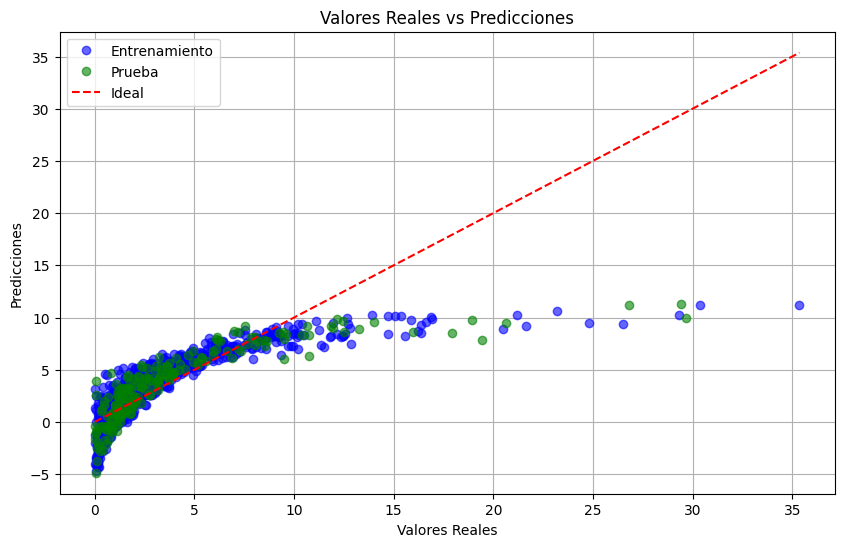

In [ ]:
# Modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicciones
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

# Métricas del modelo
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nResultados del modelo de Regresión Lineal:")
print(f"MSE (Entrenamiento): {train_mse:.4f}, MSE (Prueba): {test_mse:.4f}")
print(f"R² (Entrenamiento): {train_r2:.4f}, R² (Prueba): {test_r2:.4f}")

# Gráfico: Desempeño del modelo en entrenamiento y prueba
plt.figure(figsize=(10, 6))
plt.plot(y_train, y_train_pred, "bo", label="Entrenamiento", alpha=0.6)
plt.plot(y_test, y_test_pred, "go", label="Prueba", alpha=0.6)
plt.plot([min(y), max(y)], [min(y), max(y)], color="red", linestyle="--", label="Ideal")
plt.title("Valores Reales vs Predicciones")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.legend()
plt.grid()
plt.show()

# Evaluacion de Metricas:

**MSE (Entrenamiento): 6.0860: El modelo tiene un error cuadrático medio de aproximadamente 6.0860 en el conjunto de entrenamiento. Esto indica que las predicciones del modelo están, en promedio, a una distancia de alrededor de 6.086 unidades de los valores reales.**

**R² (Entrenamiento): 0.6123: En el conjunto de entrenamiento, el modelo es capaz de explicar aproximadamente el 61.23% de la variabilidad de la "Morosidad Promedio". Esto sugiere que el modelo tiene un buen ajuste a los datos de entrenamiento, pero no es perfecto.**

**MSE (Prueba): 9.8167: En el conjunto de prueba, el error cuadrático medio aumenta a aproximadamente 9.8167, lo que indica que las predicciones del modelo no son tan precisas en los datos no vistos (prueba), en comparación con los datos de entrenamiento.**


**R² (Prueba): 0.6016: En el conjunto de prueba, el modelo mantiene una capacidad de explicación similar, con un 60.16%. Esto sugiere que el modelo generaliza razonablemente bien a nuevos datos, aunque el desempeño en la prueba es ligeramente inferior al de entrenamiento, lo que es común.**

# **Modelo LINEAL**
# Conclusion:

El modelo no presenta un sobreajuste, ya que el error en los datos de prueba no es considerablemente mayor que el error en el conjunto de entrenamiento. Los valores de R² en ambos conjuntos son bastante cercanos, lo que indica que el modelo mantiene una capacidad razonable para generalizar



## Ejercicio de hiper parámetro tunning.

Modificar uno de los modelos para probarlo con diferentes valores para uno de sus hiperparámetros, indicando para cuáles se evidencia subajuste y en cuáles sobreajuste.

Grafique la métrica de desempeño vs los valores del hiperarámetro para observar ambas curvas de error durante el entrenamiento y durante el testeo.





Errores en diferentes valores de alpha:
Alpha: 0.01, Train Error: 6.0860, Test Error: 9.8168
Alpha: 0.1, Train Error: 6.0860, Test Error: 9.8172
Alpha: 1, Train Error: 6.0860, Test Error: 9.8220
Alpha: 10, Train Error: 6.0875, Test Error: 9.8708
Alpha: 100, Train Error: 6.2107, Test Error: 10.4295


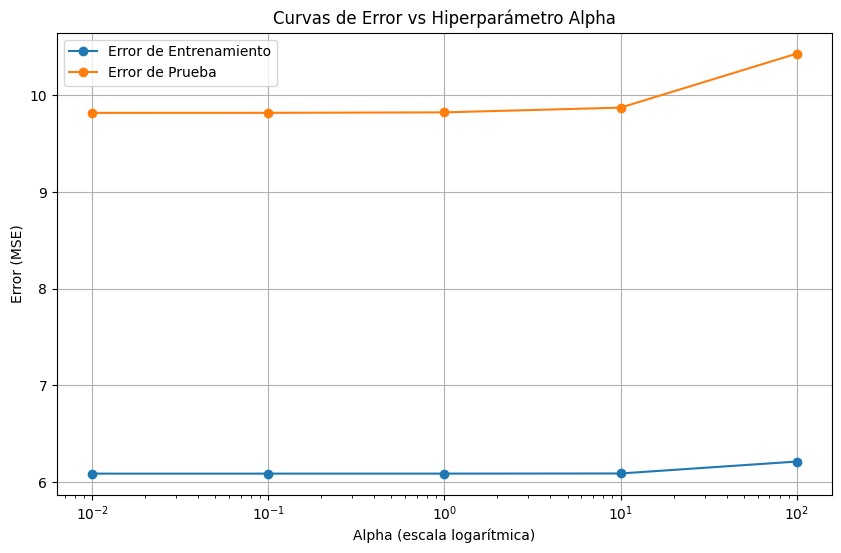


Resultados del modelo de ridge Regression (α=10):
MSE (Entrenamiento): 6.0860, MSE (Prueba): 9.8220
R² (Entrenamiento): 0.6123, R² (Prueba): 0.6014


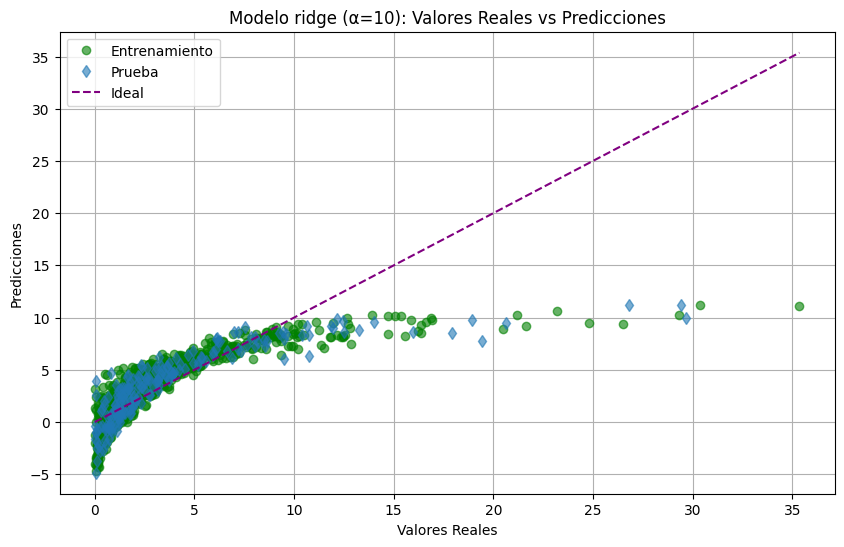

In [ ]:
# ---- Modelo nuevo: Ridge Regression con ajuste de hiperparámetros ----
alphas = [0.01, 0.1, 1, 10, 100]  # Valores para el hiperparámetro alpha
train_errors = []
test_errors = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)

    # Predicciones y cálculo de errores
    train_errors.append(mean_squared_error(y_train, ridge_model.predict(X_train)))
    test_errors.append(mean_squared_error(y_test, ridge_model.predict(X_test)))

# Identificación de subajuste y sobreajuste
print("\nErrores en diferentes valores de alpha:")
for i, alpha in enumerate(alphas):
    print(f"Alpha: {alpha}, Train Error: {train_errors[i]:.4f}, Test Error: {test_errors[i]:.4f}")

# Gráfico: Curvas de error vs Hiperparámetro alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, label="Error de Entrenamiento", marker="o")
plt.plot(alphas, test_errors, label="Error de Prueba", marker="o")
plt.xscale("log")
plt.xlabel("Alpha (escala logarítmica)")
plt.ylabel("Error (MSE)")
plt.title("Curvas de Error vs Hiperparámetro Alpha")
plt.legend()
plt.grid()
plt.show()

ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)

# Predicciones del modelo ridge
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

# Métricas del modelo ridge
ridge_train_mse = mean_squared_error(y_train, y_train_pred_ridge)
ridge_test_mse = mean_squared_error(y_test, y_test_pred_ridge)
ridge_train_r2 = r2_score(y_train, y_train_pred_ridge)
ridge_test_r2 = r2_score(y_test, y_test_pred_ridge)

print("\nResultados del modelo de ridge Regression (α=10):")
print(f"MSE (Entrenamiento): {ridge_train_mse:.4f}, MSE (Prueba): {ridge_test_mse:.4f}")
print(f"R² (Entrenamiento): {ridge_train_r2:.4f}, R² (Prueba): {ridge_test_r2:.4f}")

# Visualización de desempeño del modelo ridge
plt.figure(figsize=(10, 6))
plt.plot(y_train, y_train_pred_ridge, "go", label="Entrenamiento", alpha=0.6)
plt.plot(y_test, y_test_pred_ridge, "d", label="Prueba", alpha=0.6)
plt.plot([min(y), max(y)], [min(y), max(y)], color="purple", linestyle="--", label="Ideal")
plt.title("Modelo ridge (α=10): Valores Reales vs Predicciones")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.legend()
plt.grid()
plt.show()

# **Modelo Ridge**

#Analisis Modelo Ridge:

Para valores pequeños de alpha (0.01), el modelo muestra sobreajuste, ya que el modelo tiene demasiada flexibilidad y se ajusta demasiado a los datos de entrenamiento, lo que puede hacer que no generalice bien a los datos de prueba.

Valores intermedios de alpha (por ejemplo, 1 y 10) equilibran el error de entrenamiento y prueba, lo que sugiere que estos valores pueden ser más adecuados para un buen ajuste sin caer en sobreajuste ni subajuste.

Para valores grandes de alpha (100), el modelo muestra subajuste, ya que la regularización es demasiado fuerte y el modelo no es capaz de capturar adecuadamente las relaciones entre las variables.



# **Comparacion del Modelo Lineal y el Modelo de Ridge (alpha = 1)**
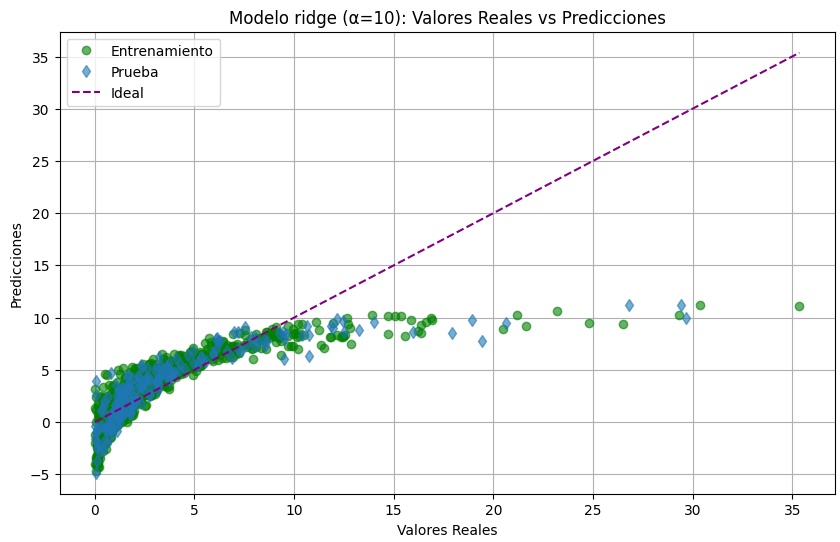

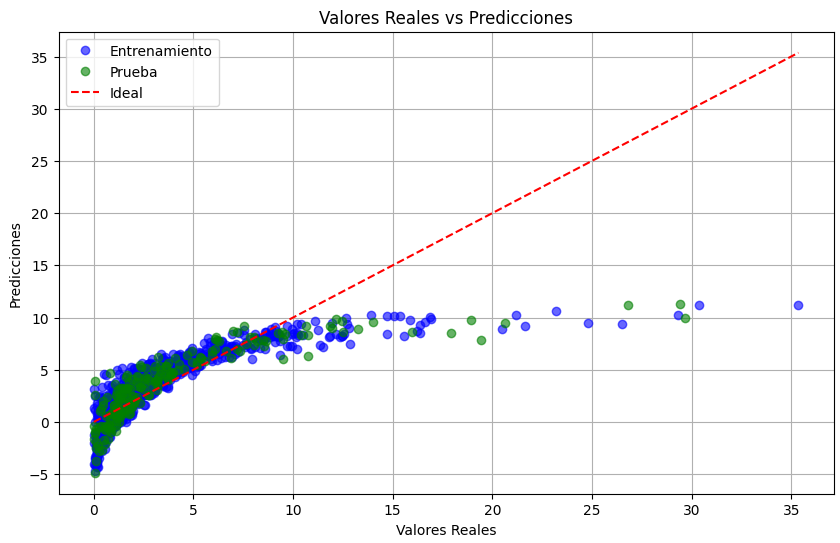

# **Conclusion Modelo Ridge:**

Al seleccionar un α adecuado, Ridge Regression permite controlar el grado de penalización de los coeficientes del modelo. Un valor óptimo de α ayuda a equilibrar el ajuste del modelo, permitiendo que se ajuste lo suficiente a los datos sin que se sobreajuste, a la vez que evita la rigidez excesiva que produce el subajuste. Esto resulta en un modelo más robusto y generalizable, que mantiene un rendimiento consistente tanto en el conjunto de entrenamiento como en el conjunto de prueba.

En resumen, el modelo de Ridge Regression con un valor adecuado de α permite encontrar un equilibrio ideal entre la flexibilidad y la regularización, lo que mejora la capacidad del modelo para generalizar a nuevos datos y evitar tanto el sobreajuste como el subajuste.

Fuentes:
Github=https://github.com/danielperhez/P02_PD_Models

Stackoverflow=https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python

Material de estudio, tambien los notebooks del campus

Gemini="Genera un dataset sintetico de información financiera y operativa de empresas en diferentes sectores"

ChatGpt="Aplica un One Hot encoding y Estandariza mi dataset"